In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lstm = pd.read_csv('lstm.csv')
xgboost = pd.read_csv('xgboost.csv')
prophet = pd.read_csv('prophet_yhat.csv')
pycaret = pd.read_csv('pycaret.csv')
neural = pd.read_csv('Neuralprophet_yhat.csv')
best = pd.read_csv('best.csv') # 본선 최종1등한거
lstm, xgboost, prophet, pycaret, neural, best

(     YEAR  MONTH         CIVIL           IND
 0    2021      1  1.928091e+06  8.168679e+05
 1    2021      2  1.654362e+06  7.501699e+05
 2    2021      3  1.358824e+06  6.698526e+05
 3    2021      4  9.756631e+05  6.027633e+05
 4    2021      5  6.002796e+05  5.635385e+05
 ..    ...    ...           ...           ...
 163  2034      8  3.788416e+05  1.361335e+06
 164  2034      9  3.637946e+05  1.288180e+06
 165  2034     10  4.231505e+05  1.247405e+06
 166  2034     11  7.504679e+05  1.235867e+06
 167  2034     12  1.513220e+06  1.266889e+06
 
 [168 rows x 4 columns],
      YEAR  MONTH         CIVIL           IND
 0    2021      1  1.833040e+06  656802.50000
 1    2021      2  1.642870e+06  592907.43750
 2    2021      3  1.233613e+06  568966.75000
 3    2021      4  9.313156e+05  511027.43750
 4    2021      5  5.105064e+05  441063.68750
 ..    ...    ...           ...           ...
 163  2034      8  4.952107e+05  516405.18750
 164  2034      9  4.952107e+05  523767.65625
 165  2

In [3]:
result = pd.read_csv('result.csv')

In [4]:
final = pd.DataFrame()
final['YEAR'] = lstm['YEAR']
final['MONTH'] = lstm['MONTH']
final

,YEAR,MONTH
0,2021,1
1,2021,2
2,2021,3
3,2021,4
4,2021,5
...,...,...
163,2034,8
164,2034,9
165,2034,10
166,2034,11


In [5]:
final['CIVIL'] = lstm['CIVIL']*0.4 + xgboost['CIVIL']*0.4 + prophet['CIVIL']*0.2
final['IND'] = lstm['IND']*0.5 + xgboost['IND']*0.2 + prophet['IND']*0.3
final

,YEAR,MONTH,CIVIL,IND
0,2021,1,1.917937e+06,7.688944e+05
1,2021,2,1.656534e+06,6.854413e+05
2,2021,3,1.317346e+06,6.483918e+05
3,2021,4,9.408978e+05,5.750612e+05
4,2021,5,5.574082e+05,5.304252e+05
...,...,...,...,...
163,2034,8,4.466535e+05,9.582867e+05
164,2034,9,4.419206e+05,9.305850e+05
165,2034,10,6.920625e+05,9.448480e+05
166,2034,11,9.783296e+05,9.840187e+05


In [6]:
notfin = pd.DataFrame()
notfin['YEAR'] = lstm['YEAR']
notfin['MONTH'] = lstm['MONTH']

notfin['CIVIL'] = lstm['CIVIL']*0.4 + xgboost['CIVIL']*0.4 + neural['CIVIL']*0.2
notfin['IND'] = lstm['IND']*0.5 + xgboost['IND']*0.2 + neural['IND']*0.3
notfin

,YEAR,MONTH,CIVIL,IND
0,2021,1,1.923768e+06,747994.281548
1,2021,2,1.665276e+06,672055.462096
2,2021,3,1.320045e+06,633959.171374
3,2021,4,9.453055e+05,564507.375356
4,2021,5,5.606506e+05,522219.719310
...,...,...,...,...
163,2034,8,4.512950e+05,886208.644175
164,2034,9,4.441645e+05,856363.152929
165,2034,10,6.978290e+05,863958.765525
166,2034,11,1.000592e+06,897886.784438


In [7]:
final.to_csv("ensemble.csv", mode='w', index=False)

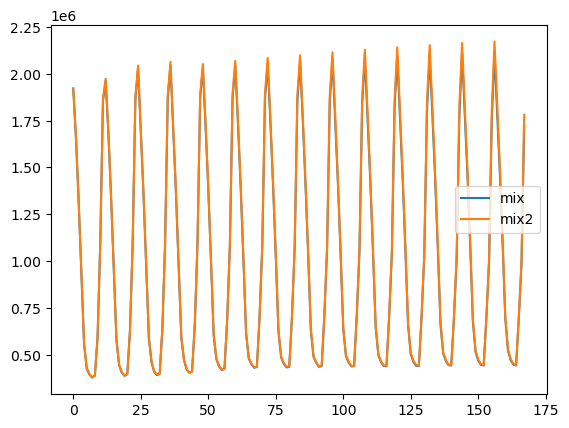

In [8]:
#lstm['CIVIL'].plot()
#xgboost['CIVIL'].plot()
best['CIVIL'].plot()
notfin['CIVIL'].plot()
#plt.legend(['lstm','xgboost','mix'])
plt.legend(['mix', 'mix2']) #mix2가 neural이랑 섞은 것.

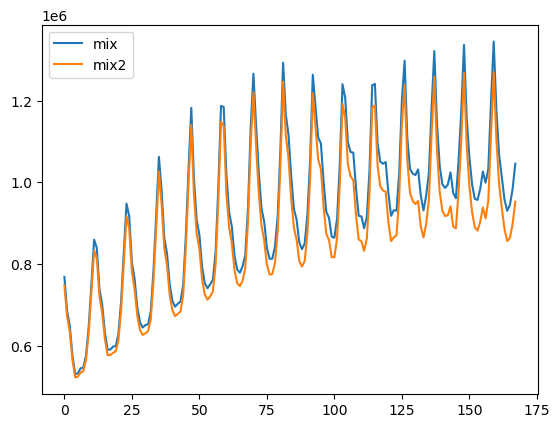

In [9]:
#lstm['IND'].plot()
#xgboost['IND'].plot()
best['IND'].plot()
notfin['IND'].plot()
#plt.legend(['lstm','xgboost','mix'])
plt.legend(['mix', 'mix2']) #mix2가 neural이랑 섞은 것.

226266.41284점(최종16만) -> lstm(단독 33만) *0.8 + xgboost(처음) *0.2

    model = Sequential()
    model.add(LSTM(300, input_shape=(12,1), return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(300, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=1)
    h = model.fit(X_train_t, Y_train, epochs=300, validation_data=[X_test_t, Y_test],
         batch_size=10, verbose=1, callbacks=[early_stop])

217826.67359점 -> lstm(단독 38만) *0.7 + xgboost *0.3
    
    model = Sequential()
    model.add(LSTM(300, input_shape=(12,1), return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(300, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=30, verbose=1)
    h = model.fit(X_train_t, Y_train, epochs=300, validation_data=[X_test_t, Y_test],
         batch_size=10, verbose=1, callbacks=[early_stop])

In [10]:
#다변수 lstm
test1 = pd.read_csv('test1.csv') #ind는 mix_best
test = pd.read_csv('test.csv') #civil은 mix_best
test1, test

(     YEAR  MONTH         CIVIL           IND
 0    2021      1  1.917532e+06  7.874673e+05
 1    2021      2  1.722909e+06  7.019610e+05
 2    2021      3  1.381242e+06  6.554978e+05
 3    2021      4  9.737200e+05  5.925702e+05
 4    2021      5  5.473830e+05  5.401481e+05
 ..    ...    ...           ...           ...
 163  2034      8  4.109634e+05  1.274580e+06
 164  2034      9  3.676720e+05  1.531357e+06
 165  2034     10  5.420778e+05  1.178432e+06
 166  2034     11  1.018946e+06  1.073665e+06
 167  2034     12  1.765891e+06  1.045460e+06
 
 [168 rows x 4 columns],
      YEAR  MONTH         CIVIL           IND
 0    2021      1  2.015628e+06  8.263918e+05
 1    2021      2  1.706217e+06  7.800263e+05
 2    2021      3  1.405068e+06  7.227257e+05
 3    2021      4  1.007458e+06  6.486163e+05
 4    2021      5  5.944197e+05  5.811832e+05
 ..    ...    ...           ...           ...
 163  2034      8  6.994520e+05  9.244229e+14
 164  2034      9  4.693833e+05  1.301222e+15
 165  2

In [11]:
best, result

(     YEAR  MONTH         CIVIL           IND
 0    2021      1  1.917937e+06  7.688944e+05
 1    2021      2  1.656534e+06  6.854413e+05
 2    2021      3  1.317346e+06  6.483918e+05
 3    2021      4  9.408978e+05  5.750612e+05
 4    2021      5  5.574082e+05  5.304252e+05
 ..    ...    ...           ...           ...
 163  2034      8  4.466535e+05  9.582867e+05
 164  2034      9  4.419206e+05  9.305850e+05
 165  2034     10  6.920625e+05  9.448480e+05
 166  2034     11  9.783296e+05  9.840187e+05
 167  2034     12  1.722349e+06  1.046097e+06
 
 [168 rows x 4 columns],
      YEAR  MONTH         CIVIL            IND
 0    2021      1  1.921994e+06  717150.719048
 1    2021      2  1.662206e+06  670828.105846
 2    2021      3  1.318514e+06  625705.608874
 3    2021      4  9.440181e+05  580378.481606
 4    2021      5  5.606297e+05  546585.063060
 ..    ...    ...           ...            ...
 163  2034      8  4.500859e+05  930174.337925
 164  2034      9  4.420930e+05  894874.89355

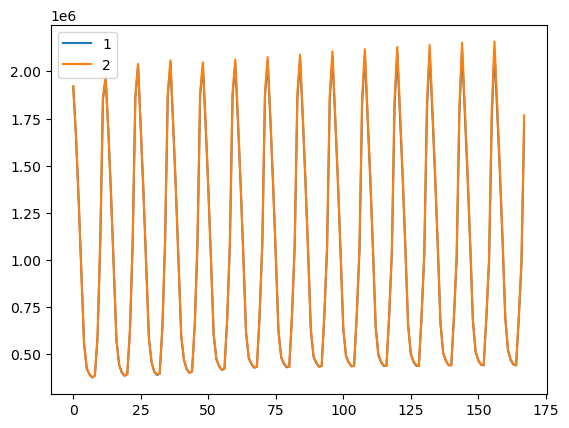

In [12]:
best['CIVIL'].plot()
result['CIVIL'].plot()
# test1['CIVIL'].plot()
# lstm['CIVIL'].plot()
# xgboost['CIVIL'].plot()
# hj['CIVIL'].plot()
# final['CIVIL'].plot()
# prophet['CIVIL'].plot()
# test1['CIVIL'].plot()
# pycaret['CIVIL'].plot()
plt.legend(['1','2','3'])

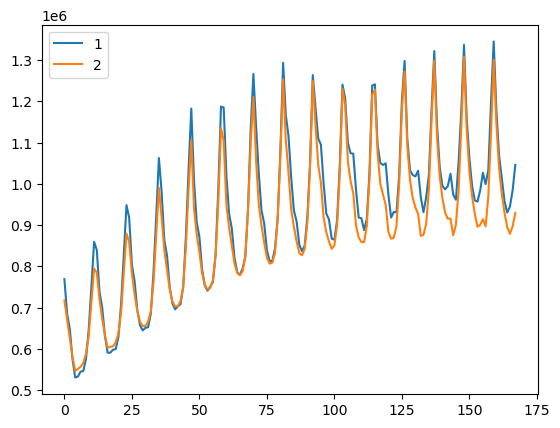

In [13]:
best['IND'].plot()
result['IND'].plot()
# test['IND'].plot()
# lstm['IND'].plot()
# xgboost['IND'].plot()
# final['IND'].plot()
# prophet['IND'].plot()
# pycaret['IND'].plot()
plt.legend(['1','2','3'])

NameError: name 'mix_best' is not defined

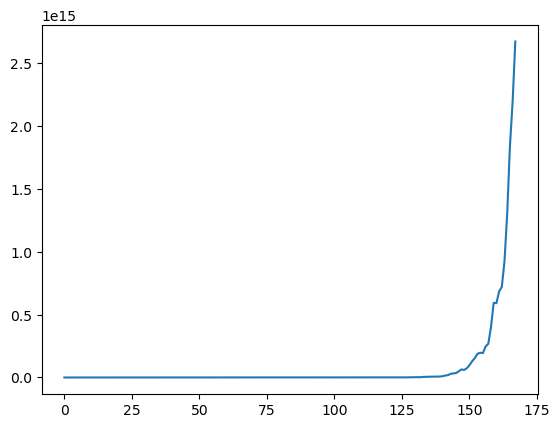

In [14]:
test['IND'].plot()
mix_best['IND'].plot()
best2['IND'].plot()
plt.legend(['test','mix_best','best2'])

In [ ]:
hj = pd.read_csv("xgtemp_civil.csv")
hj #xgboost add temper

In [ ]:
hjind = pd.read_csv("xgtemp_ind.csv")
hjind['IND'].plot()

In [ ]:
new_test = pd.read_csv('submission_sample.csv')
new_test['CIVIL'] = best2['CIVIL']
new_test['IND'] = mix_best['IND']
new_test

In [ ]:
new_test.to_csv("new_test.csv", mode='w', index=False)

In [ ]:
mix_best['CIVIL'].plot()
best2["CIVIL"].plot()
plt.legend(['best1', 'best2'])

In [ ]:
mix_best['IND'].plot()
best2["IND"].plot()
plt.legend(['best1', 'best2'])

mix_best -> 0.04849 / 
best2 -> 0.04434 / 
1civil 2ind -> 0.04746 / 
1ind 2civil -> 0.04538

    lstm_civil.h5, lstm_ind.h5 모델 불러와서 적용한 lstm.csv파일에 xgboost파일 섞어봄
    civil : lstm 0.5 + xgboost 0.5     ind : lstm 0.55 + xgboost 0.45    결과 -> 0.04332
    civil : lstm 0.55 + xgboost 0.45   ind : lstm 0.55 + xgboost 0.45    결과 -> 0.04317
    civil : lstm 0.6 + xgboost 0.4     ind : lstm 0.6 + xgboost 0.4      결과 -> 0.04958
    civil : lstm 0.6 + xgboost 0.4     ind : lstm 0.55 + xgboost 0.45    결과 -> 0.04302
    civil : lstm 0.65 + xgboost 0.35   ind : lstm 0.55 + xgboost 0.45    결과 -> 0.04292
    civil : lstm 0.7 + xgboost 0.3     ind : lstm 0.55 + xgboost 0.45    결과 -> 0.04331
    civil : lstm 0.65 + xgboost 0.35   ind : lstm 0.5 + xgboost 0.5      결과 -> 0.04096 best
    civil : lstm 0.65 + xgboost 0.35   ind : lstm 0.45 + xgboost 0.55    결과 -> 0.04963

        lstm = pd.read_csv('lstm.csv')
        xgboost = pd.read_csv('xgboost.csv')
        prophet = pd.read_csv('prophet_yhat.csv')
    civil : lstm 0.4 + xgboost 0.2 + prophet 0.4   ind : lstm 0.5 + xgboost 0.3 + prophet 0.2    결과 -> 0.04077
    civil : lstm 0.4 + xgboost 0.3 + prophet 0.3   ind : lstm 0.5 + xgboost 0.3 + prophet 0.2    결과 -> 0.03893
    civil : lstm 0.4 + xgboost 0.4 + prophet 0.2   ind : lstm 0.5 + xgboost 0.3 + prophet 0.2    결과 -> 0.03742 bb
    civil : lstm 0.4 + xgboost 0.5 + prophet 0.1   ind : lstm 0.5 + xgboost 0.3 + prophet 0.2    결과 -> 0.03789
#### civil : lstm 0.4 + xgboost 0.4 + prophet 0.2   ind : lstm 0.5 + xgboost 0.2 + prophet 0.3    결과 -> 0.03769 total best
    civil : lstm 0.4 + xgboost 0.4 + prophet 0.2   ind : lstm 0.4 + xgboost 0.4 + prophet 0.2    결과 -> 0.05136
    civil : lstm 0.4 + xgboost 0.4 + prophet 0.2   ind : lstm 0.5 + xgboost 0.4 + prophet 0.1    결과 -> 0.03836
    civil : lstm 0.4 + xgboost 0.4 + prophet 0.2   ind : lstm 0.5 + xgboost 0.35 + prophet 0.15  결과 -> 0.03777
    civil : lstm 0.4 + xgboost 0.4 + prophet 0.2   ind : lstm 0.5 + xgboost 0.25 + prophet 0.25  결과 -> 0.03745